In [2]:
from numpy import *
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

We solve

$$
\begin{align}
-u^{''}(x) &= f (x)  \quad \text{ on } (0,1)\\
u(0) &= 0\\
u^\prime(1) &= 0
\end{align}
$$

For the source term we chose

$$
f(x) = 4 \pi^2 \sin( 2 \pi x) 
$$


In [3]:
f = lambda x: 4 * np.pi**2 * np.sin(2 * np.pi * x)

def form_dense_lin_sys(N):
    twos_diag = 2*np.ones((N,))
    ones_off_diag = np.ones((N-1,))
    A = np.diag(twos_diag) - np.diag(ones_off_diag,1)  - np.diag(ones_off_diag,-1)
    h = 1/(N+1)

    b = np.zeros((N,))
    for i in range(N):
        b[i] = h**2 * f( (i+1)*h )
    return A,b

    

In [4]:

N_arr = np.array([40,80,160,320,640,1280,2560])

In [5]:
time_list = []
for N in N_arr:
    
    A,b = form_dense_lin_sys(N)
    t_start = time.time()
    x = np.linalg.solve(A,b)
    t_end = time.time()
    time_list.append(t_end-t_start)

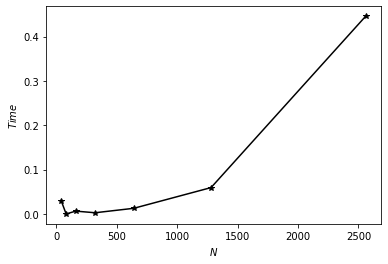

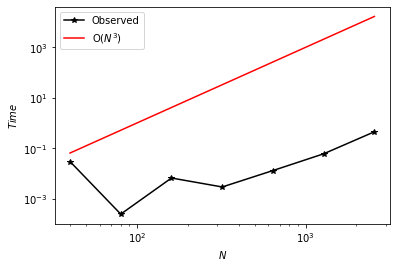

In [9]:
#Plot Results
plt.plot(N_arr,time_list,'k-*',label='Observed')
plt.xlabel('$N$')
plt.ylabel('$Time$')
plt.show()    

N_cube = np.power(N_arr,3)*1e-6

plt.loglog(N_arr,time_list,'k-*',label='Observed')
plt.loglog(N_arr,N_cube,'r-', label='O$(N^3)$')

plt.xlabel('$N$')
plt.ylabel('$Time$')

plt.legend(loc='upper left')

plt.show() 